<a href="https://colab.research.google.com/github/pabbavaishnavi11/CUSTOMER-DATA-ANALYSIS-AND-PREDICTION-/blob/main/CustomerDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/daily_offers.csv')

<ipython-input-2-701383d80528>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/daily_offers.csv')


In [ ]:
 #data.to_csv('daily_offers.csv',index=False)

In [ ]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
features_with_na=[feature for feature in data.columns if data[feature].isnull().sum()>1 ]
for feature in features_with_na:
  print(feature,np.round(data[feature].isnull().mean(),4),"is the percentage of missing values")

id 0.0 is the percentage of missing values
country 0.0002 is the percentage of missing values
status 0.0 is the percentage of missing values
application 0.0001 is the percentage of missing values
material_ref 0.4289 is the percentage of missing values


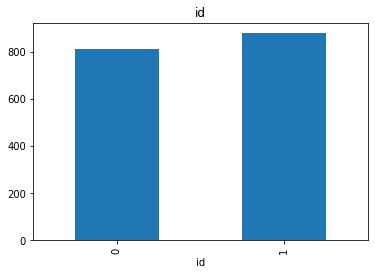

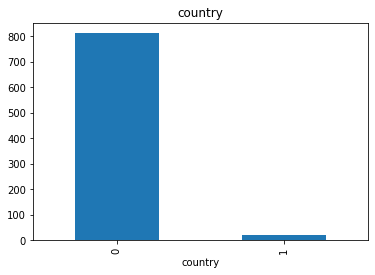

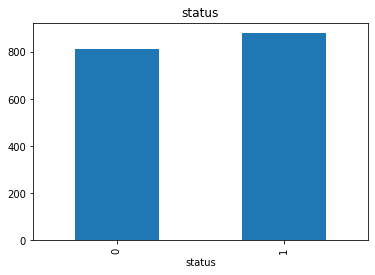

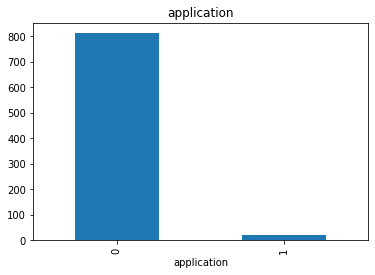

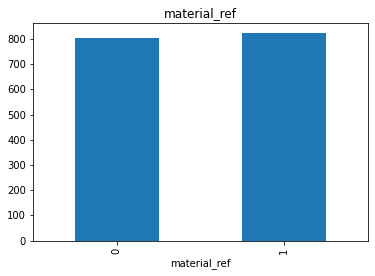

In [ ]:
for feature in features_with_na:
    data1 = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data1[feature] = np.where(data1[feature].isnull(), 1, 0)
    
    # let's calculate the mean Selling_price where the information is missing or present
    data1.groupby(feature)['selling_price'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
data['status'].value_counts()

Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [ ]:
Won=data[data.status=='Won']
Lost=data[data.status=='Lost']
Not_lost_for_AM=data[data.status=='Not lost for AM']
Revised=data[data.status=='Revised']
To_be_approved=data[data.status=='To be approved']
Draft=data[data.status=='Draft']
Offered =data[data.status=='Offered']
Offerable=data[data.status=='Offerable']
Wonderful=data[data.status=='Wonderful']

In [ ]:
Won=Won.sample(n=3140)
Lost=Lost.sample(n=3140)
Not_lost_for_AM=Not_lost_for_AM.sample(n=3140)
Revised=Revised.sample(n=3140)
To_be_approved=To_be_approved.sample(n=3140)
Draft=Draft.sample(n=3140)

In [ ]:
df=pd.concat([Won,Lost,Not_lost_for_AM,Revised,To_be_approved,Draft],axis=0)

In [ ]:
df['status'].value_counts()

Won                3140
Lost               3140
Not lost for AM    3140
Revised            3140
To be approved     3140
Draft              3140
Name: status, dtype: int64

Numerical nd categorical


In [ ]:
# list of numerical variables
numerical_val=[feature for feature in df.columns if df[feature].dtype!='O']
print('number of numerical variables is',len(numerical_val))

number of numerical variables is 9


In [ ]:
df[numerical_val].head()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
131098,20201005.0,30272262.0,28.0,10.0,8.00,1035.0,640665,20201201.0,614.0
14167,20210316.0,30206203.0,26.0,41.0,0.75,1250.0,611993,20210701.0,1194.0
83492,20201208.0,30205376.0,25.0,26.0,1.50,1180.0,164141591,20210401.0,862.0
114773,20201027.0,30267637.0,28.0,41.0,0.42,1220.0,611993,20201001.0,777.0
175691,20200709.0,30332305.0,77.0,59.0,2.75,1494.0,640665,20200801.0,430.0


we have 2 varibales with date yr so we can identify the relation or differnce btw item date and delivery_date

In [ ]:
date_feature=[feature for feature in df.columns if 'date'in feature]

In [ ]:
date_feature

['item_date', 'delivery date']

In [ ]:
for feature in date_feature:
    print(feature, df[feature].unique())

item_date [20201005. 20210316. 20201208. 20201027. 20200709. 20200803. 20210108.
 20200706. 20201020. 20210309. 20200702. 20201201. 20200708. 20210304.
 20201117. 20200821. 20201202. 20200707. 20210312. 20200907. 20201215.
 20210301. 20210107. 20210203. 20200828. 20201211. 20200930. 20201210.
 20201120. 20210113. 20200917. 20210129. 20210302. 20201026. 20210401.
 20210310. 20201130. 20201216. 20210318. 20210121. 20201126. 20200715.
 20201008. 20210224. 20210317. 20210212. 20201021. 20210128. 20210126.
 20210226. 20200817. 20200729. 20201113. 20200717. 20201217. 20200810.
 20210219. 20201124. 20210114. 20210323. 20200922. 20201222. 20200713.
 20210324. 20201028. 20210115. 20201006. 20201207. 20210222. 20200902.
 20210216. 20201019. 20210125. 20210111. 20210308. 20200805. 20201105.
 20201001. 20201013. 20201029. 20201203. 20210119. 20200727. 20201127.
 20200914. 20201116. 20210331. 20200813. 20201125. 20201015. 20200722.
 20200723. 20210303. 20200728. 20200918. 20210105. 20201115. 202103

Analusing btw item_date nd delivery_date wrt to Selling_price


Text(0.5, 1.0, 'selling_price vs delivery date')

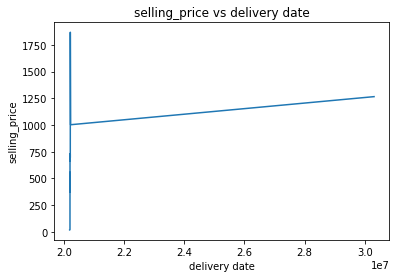

In [ ]:
df.groupby('delivery date')['selling_price'].median().plot()
plt.xlabel('delivery date')
plt.ylabel('selling_price')
plt.title("selling_price vs delivery date")

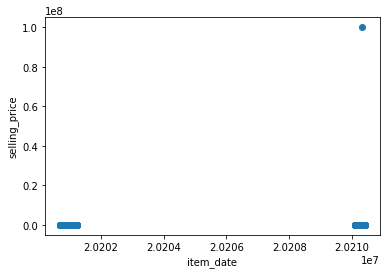

In [ ]:
plt.scatter(df['item_date'],df['selling_price'])
plt.xlabel('item_date')
plt.ylabel('selling_price')
plt.show()

Numeric----Discrete and continuous

Discrete

In [ ]:
discrete_features=[feature for feature in numerical_val if len(df[feature].unique())<35 and feature not in date_feature ]
print("the count",len(discrete_features))

the count 3


In [ ]:
discrete_features

['country', 'application', 'product_ref']

In [ ]:
df[discrete_features].head()

,country,application,product_ref
131098,28.0,10.0,640665
14167,26.0,41.0,611993
83492,25.0,26.0,164141591
114773,28.0,41.0,611993
175691,77.0,59.0,640665


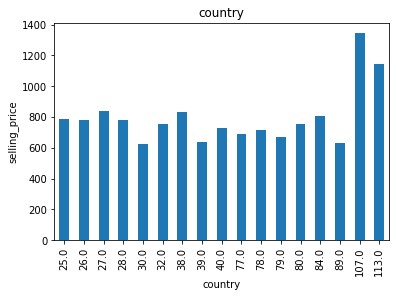

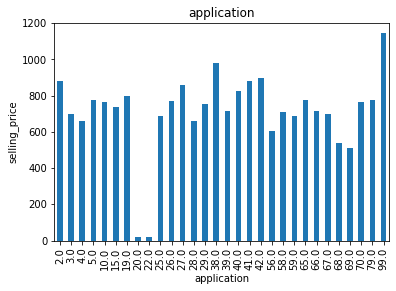

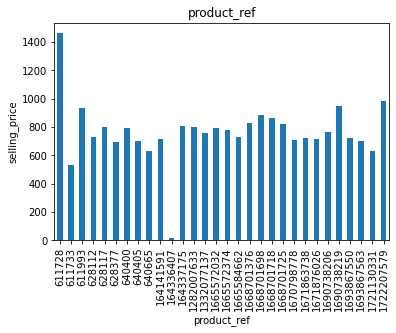

In [ ]:
for feature in discrete_features:
    data=df.copy()
    data.groupby(feature)['selling_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('selling_price')
    plt.title(feature)
    plt.show()

Continous Variables


In [ ]:
continuous_features=[feature for feature in numerical_val if feature not in discrete_features+date_feature+['id','customer','application']]
print("Continuous feature Count ",(len(continuous_features)))

Continuous feature Count  3


In [ ]:
continuous_features

['thickness', 'width', 'selling_price']

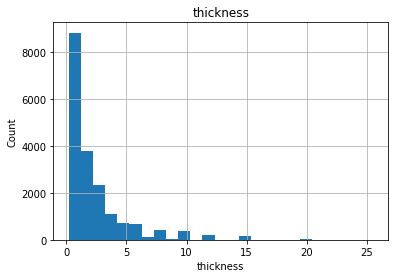

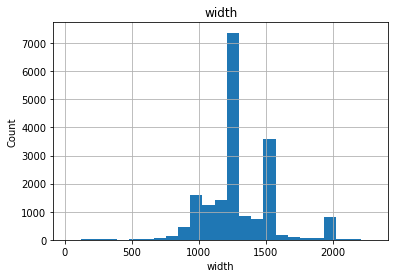

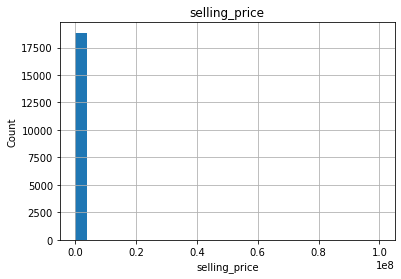

In [ ]:
for feature in continuous_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

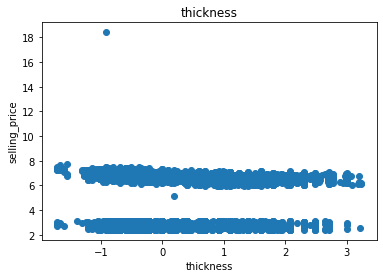

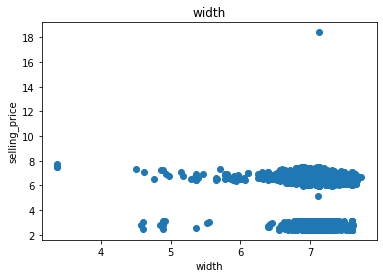

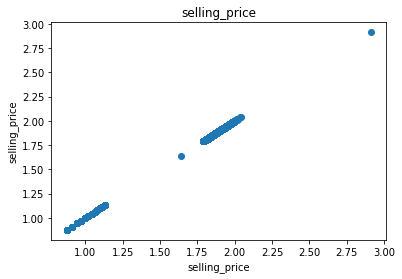

In [ ]:
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['selling_price']=np.log(data['selling_price'])
        plt.scatter(data[feature],data['selling_price'])
        plt.xlabel(feature)
        plt.ylabel('selling_price')
        plt.title(feature)
        plt.show()

Outliers

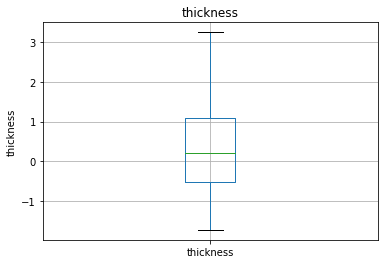

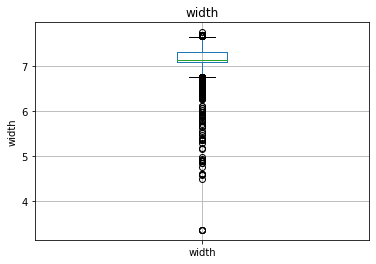

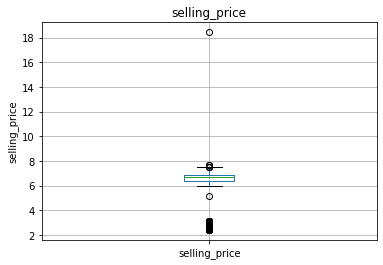

In [ ]:
for feature in continuous_features:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-30-79b5faf99054>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


Categorical Variables

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['id', 'quantity tons', 'status', 'item type', 'material_ref']

In [ ]:
df[categorical_features].head()

,id,quantity tons,status,item type,material_ref
14167,4EE9C111-70EE-45C2-B320-6ADBD742E19D,12.57651,Won,W,NaN
83492,D0F9BE08-3D74-4E29-83E8-A2C4F116591D,25.665681,Won,W,GCS350GD 1.50
114773,821FEBD3-9818-4272-9475-ABF0BF2A70E4,84.940393,Won,S,NaN
175691,6E7792FF-5D85-47CC-957C-57F47B08264C,0.21342692547126602,Won,W,4500267258/K99/191/00020
162318,A3A1478D-90B2-4B4E-AD02-E1E53DF8AAED,33.629591276456345,Won,S,KRA DX51D+Z MAC


unquie features in categorical variables

In [ ]:
for feature in categorical_features:
  print('the unqiue features in {} are {}'.format(feature,len(df[feature].unique())))

the unqiue features in id are 9933
the unqiue features in quantity tons are 9933
the unqiue features in status are 5
the unqiue features in item type are 5
the unqiue features in material_ref are 2784


In [ ]:
df.shape


(9933, 14)

In [ ]:
df=df.drop('id',axis=1)
df=df.drop('quantity tons',axis=1)
#df=df.drop('material_ref',axis=1)


In [ ]:
#df=df.drop('item_date',axis=1)

In [ ]:
#df['quantity tons'] = df['quantity tons'].replace('e', np.nan)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status']=le.fit_transform(df['status'])
df['item type']=le.fit_transform(df['item type'])
df['item_date']=le.fit_transform(df['item_date'])

In [ ]:
df['material_ref']=le.fit_transform(df['material_ref'])

In [ ]:
df.head(2)

,item_date,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
14167,205,30206203.0,26.0,4,3,41.0,0.75,1250.0,2783,611993,20210701.0,1194.0
83492,125,30205376.0,25.0,4,3,26.0,1.50,1180.0,1864,164141591,20210401.0,862.0


In [ ]:
y=df[['selling_price']]

In [ ]:
df=df.drop('customer',axis=1)

In [ ]:
x=df.drop(['selling_price'],axis=1)



In [ ]:
#x=x.drop(['item_date'],axis=1)

Feature selection suing Lasso 
alpha =0.05 
the bigger alpha less features are selected

In [ ]:
x.head(2)


,item_date,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date
14167,205,26.0,4,3,41.0,0.75,1250.0,2783,611993,20210701.0
83492,125,25.0,4,3,26.0,1.50,1180.0,1864,164141591,20210401.0


In [ ]:
x.isna().sum()

item_date        0
country          1
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
x['country']=imputer.fit_transform(x[['country']])
#x['thickness']=imputer.fit_transform(x[['thickness']])
#x['application']=imputer.fit_transform(x[['application']])
#x['delivery date']=imputer.fit_transform(x[['delivery date']])

In [ ]:
y.isna().sum()

selling_price    0
dtype: int64

In [ ]:
y.mean()

selling_price    875.668261
dtype: float64

In [ ]:
imputer_1= SimpleImputer(strategy='mean')
y['selling_price']=imputer.fit_transform(y[['selling_price']])


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [ ]:
# print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x.columns[(feature_sel_model.get_support())]


print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 10
selected features: 9


In [ ]:
selected_feat

Index(['item_date', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'material_ref', 'delivery date'],
      dtype='object')

In [ ]:
x=x[selected_feat]

In [ ]:
x.head()

,item_date,country,status,item type,application,thickness,width,material_ref,delivery date
14167,205,26.0,4,3,41.0,0.75,1250.0,2783,20210701.0
83492,125,25.0,4,3,26.0,1.50,1180.0,1864,20210401.0
114773,91,28.0,4,2,41.0,0.42,1220.0,2783,20201001.0
175691,6,77.0,4,3,59.0,2.75,1494.0,1140,20200801.0
162318,25,78.0,4,2,41.0,1.00,1500.0,2021,20200901.0


In [ ]:
x['delivery date']=le.fit_transform(x['delivery date'])

<ipython-input-59-bf5375620769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['delivery date']=le.fit_transform(x['delivery date'])


Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the data
scaler.fit(x)

# transform the data using the scaler
x_n = scaler.transform(x)

In [ ]:
x_n

array([[0.93607306, 0.01136364, 1.        , ..., 0.42606516, 1.        ,
        0.88888889],
       [0.57077626, 0.        , 1.        , ..., 0.36758563, 0.66978081,
        0.72222222],
       [0.41552511, 0.03409091, 1.        , ..., 0.40100251, 1.        ,
        0.38888889],
       ...,
       [0.77625571, 0.60227273, 0.75      , ..., 0.42272348, 0.66475027,
        0.72222222],
       [0.87671233, 0.02272727, 0.75      , ..., 0.38429407, 0.68451312,
        0.77777778],
       [0.76255708, 0.60227273, 0.75      , ..., 0.42606516, 0.83327345,
        0.72222222]])

In [ ]:
x

,item_date,country,status,item type,application,thickness,width,material_ref,delivery date
14167,205,26.0,4,3,41.0,0.75,1250.0,2783,16
83492,125,25.0,4,3,26.0,1.50,1180.0,1864,13
114773,91,28.0,4,2,41.0,0.42,1220.0,2783,7
175691,6,77.0,4,3,59.0,2.75,1494.0,1140,5
162318,25,78.0,4,2,41.0,1.00,1500.0,2021,6
...,...,...,...,...,...,...,...,...,...
98015,112,27.0,3,2,42.0,2.00,1130.0,2583,10
38575,182,39.0,3,3,10.0,0.50,1250.0,2783,15
47647,170,78.0,3,3,41.0,0.63,1246.0,1850,13
30327,192,27.0,3,2,59.0,0.80,1200.0,1905,14


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_n, y, test_size=0.1, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


In [ ]:
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()


In [ ]:
linear_reg.fit(x_train, y_train)
y_pred_linear = linear_reg.predict(x_test)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression R2 Score:", r2_linear)

Linear Regression R2 Score: 0.5378641068469522


In [ ]:
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R2 Score:", r2_ridge)


Ridge Regression R2 Score: 0.5380076864796741


In [ ]:
  lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression R2 Score:", r2_lasso)


Lasso Regression R2 Score: 0.5343491568760872


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred_svr = regressor.predict(x_test)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR R2 Score:", r2_svr)


SVR R2 Score: 0.5378358240003793


In [ ]:
from sklearn.tree import DecisionTreeRegressor
r= DecisionTreeRegressor(random_state = 0)
r.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred_decision = r.predict(x_test)
r2_decision = r2_score(y_test, y_pred_decision)
print("Decision tree R2 Score:", r2_decision)


Decision tree R2 Score: 0.6752145778217593


In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
reg.fit(x_train, y_train)

<ipython-input-88-5a17c1727703>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred_random = reg.predict(x_test)
r2_random = r2_score(y_test, y_pred_random)
print("Random Forest R2 Score:", r2_random)


Random Forest R2 Score: 0.8054978125269294
